**Linear and Quadratic Discriminant Analysis**

Linear Discriminant Analysis and Quadratic Discriminant Analysis are two classic classifiers, with, as theis names hint, a linear and a quadratic suface, respectively

# 1 Dimensionality reduction
**discriminant_analysis.LinearDiscriminantAnalysis** can be used to perform supervised dimensionaliy reducion, by projecting the input data to a linear subspace consisting of teh directions which maximize the seperation between calsses.

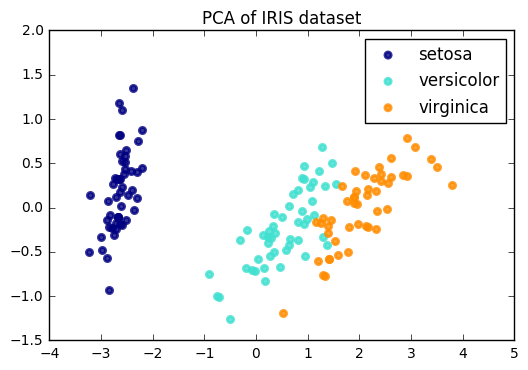

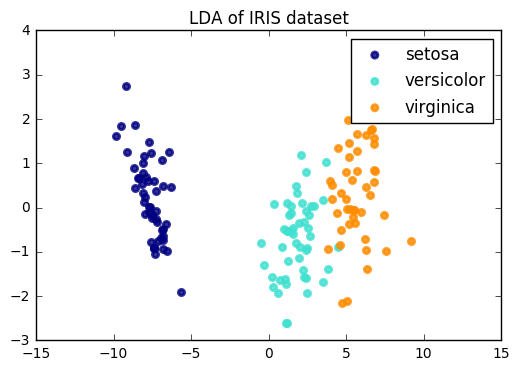

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
pca = PCA(n_components=2)
X_r =pca.fit(X).transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color= color, alpha=0.8,
               lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y==i, 0], X_r2[y==i, 1], color= color, alpha=0.8,
               lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

# 2 Mathematical formulation
Predicitions can be then be obtained by using Bayes's rule:
$$P(y = k \vert X) = \frac{P(X\vert y =k)P(y=k)}{P(X)}=\frac{P(X\vert y=k)\cdot P(y=k)}{\sum_{l}P(X\vert y=l)\cdot P(y=l)}$$

More specially, for linear and quadratic discriminant analysis, $P(X\vert y)$ is modelled a multivariate Gaussian distribution with density.
$$p(X\vert y=k)=\frac{1}{(2\pi)^n\vert \sum_{k} \vert ^{1/2}}exp\bigg(-\frac{1}{2}(X-\mu_k)^t {\sum_{k}}^{-1}(X-\mu_k)\bigg)$$
In the case of LDA, the Gaussians for each class are assumed the share the same covariance matrix: $\sum_{k}=\sum$ for all $k$. This leads to linear decision surfaces between, as can be seen by the comparing the log-probability ratios
$$\log\bigg(\frac{P(y=k \vert X)}{P(y=l \vert X)}\bigg) = 0 \Leftrightarrow \frac{1}{2}(\mu_k^{t}{\sum}^{-1}\mu_k-\mu_{l}^{t}{\sum}^{-1}\mu_{l})$$

# 3 Shrinkage
A tool to improve the estimation of covariance matrices in situations where the number of the training samples is small compared to the number of features.  
Shrinkage LDA can be used by setting the **shrinkage** parameters of the $ \underline{discriminant\_analysis.LinearDistriminantAnalysis} $ class to 'auto'. 

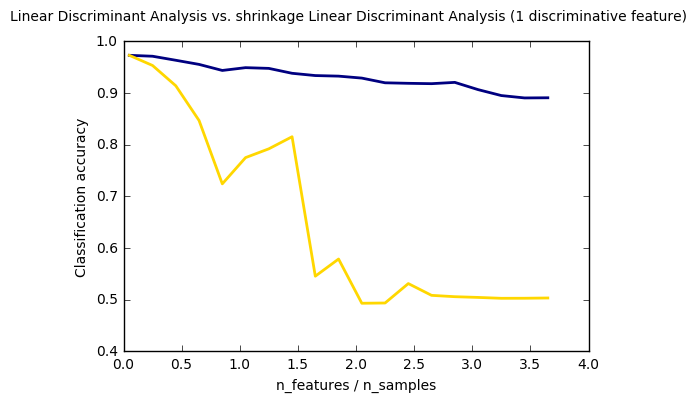

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
n_trains = 20
n_test = 200
n_averages = 50
n_features_max = 75
step = 4
def generate_data(n_samples, n_featues):
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features-1)])
    return X, y
acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max+1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_trains, n_features)
        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)
        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
freature_samples_ratio = np.array(n_features_range) / n_trains
features_samples_ratio = np.array(n_features_range) / n_trains

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

#plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')
plt.show()